In [161]:
import numpy as np
import matplotlib.pyplot as mpl
import sklearn.datasets

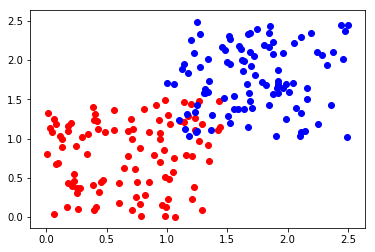

In [162]:
# We create some data
d1 = np.stack(
    [np.random.uniform(high=1.5, low=0, size=100), np.random.uniform(high=1.5, low=0, size=100), np.repeat(1, 100)],
    axis=1)
d2 = np.stack(
    [np.random.uniform(high=2.5, low=1, size=100), np.random.uniform(high=2.5, low=1, size=100), np.repeat(2,100)],
    axis=1)

mpl.scatter(d1[:,0], d1[:,1], c="r")
mpl.scatter(d2[:,0], d2[:,1], c="b")
mpl.show()

In [163]:
# We make our function
def knn(dataset, query, k=3):
    # Get distances
    dist = np.sqrt(np.sum((dataset[:,:-1] - query) ** 2, axis=1))
    
    # Sort distances and get indexes (increasing order)
    index = np.argsort(dist)

    # Get the K first points
    nearest = dataset[index[:k]]
    
    # Get classes
    classes = np.unique(dataset[:,-1])
    count = [ sum(nearest[:,-1] == i) for i in classes ]
    
    # Get maximum
    idx = np.argmax(count)
    
    # Return class
    return classes[idx]

# And we test it
knn(np.concatenate([d1, d2]), [1.3, 1.3], k=7)

2.0

In [164]:
# We load the iris set
iris = sklearn.datasets.load_iris()
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [165]:
iris.feature_names, iris.data, iris.target, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [

In [166]:
data = np.column_stack([iris.data, iris.target])
np.random.shuffle(data)

# We create our test and train sets
lim = int(0.7 * data.shape[0])
train = data[:lim]
test = data[lim:]
train.size, test.size

(525, 225)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


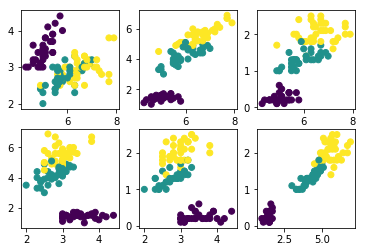

In [167]:
# We plot the iris train data
fig, ax = mpl.subplots(2, 3)
ax[0,0].scatter(train[:,0], train[:,1], c=train[:,-1])
ax[0,1].scatter(train[:,0], train[:,2], c=train[:,-1])
ax[0,2].scatter(train[:,0], train[:,3], c=train[:,-1])
ax[1,0].scatter(train[:,1], train[:,2], c=train[:,-1])
ax[1,1].scatter(train[:,1], train[:,3], c=train[:,-1])
ax[1,2].scatter(train[:,2], train[:,3], c=train[:,-1])


fig.show()

In [168]:
# We test our algorithm
right = 0
for query in test:
    expected = query[-1]
    gotten = knn(train, query[:-1], k=6)
    if(expected == gotten):
        right += 1

# We print the accuracy
right / test.shape[0]

0.9777777777777777

In [174]:
from sklearn.neighbors import KNeighborsClassifier

In [193]:
sknn = KNeighborsClassifier(n_neighbors=5)

sknn.fit(train[:,:-1], train[:,-1])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [194]:
# We test our algorithm
expected = test[:,-1]
gotten = sknn.predict(test[:,:-1])
right = sum(expected == gotten)

# We print the accuracy
right / test.shape[0]

0.9777777777777777